<a href="https://colab.research.google.com/github/Ahmedaboenaba/Machine-Learning/blob/main/Clustering/Wholesale_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wholesale customers

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

### Metadata
1)	FRESH: annual spending (m.u.) on fresh products (Continuous);

2)	MILK: annual spending (m.u.) on milk products (Continuous);

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)


### Objective: Clustering
### Data source: Cardoso, M. (2013). Wholesale customers [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5030X.

## Pipeline

### Necessary Libraries

In [ ]:
#Install Important Libraries
!pip install ucimlrepo

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading from UCI
from ucimlrepo import fetch_ucirepo

### Data Loading

In [ ]:
# fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets



In [ ]:
X = pd.DataFrame(X)
y= pd.DataFrame(y)

### Exploring

In [ ]:
X.shape

(440, 7)

In [ ]:
y.shape

(440, 1)

In [ ]:
X.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [ ]:
y.columns

Index(['Region'], dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Fresh             440 non-null    int64
 2   Milk              440 non-null    int64
 3   Grocery           440 non-null    int64
 4   Frozen            440 non-null    int64
 5   Detergents_Paper  440 non-null    int64
 6   Delicassen        440 non-null    int64
dtypes: int64(7)
memory usage: 24.2 KB


In [ ]:
X.describe()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
y.describe()

,Region
count,440.000000
mean,2.543182
std,0.774272
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [ ]:
#Check Missing Variables in input features
X.isna().sum()

,0
Channel,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
y.isna().sum()

,0
Region,0


In [ ]:
#check Duplicates
X.duplicated().sum()

np.int64(0)

### EDA

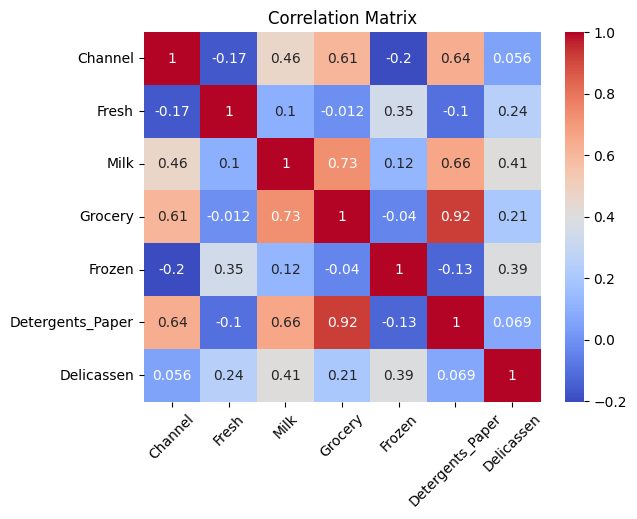

In [ ]:
# Correlation matrix
corr = X.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

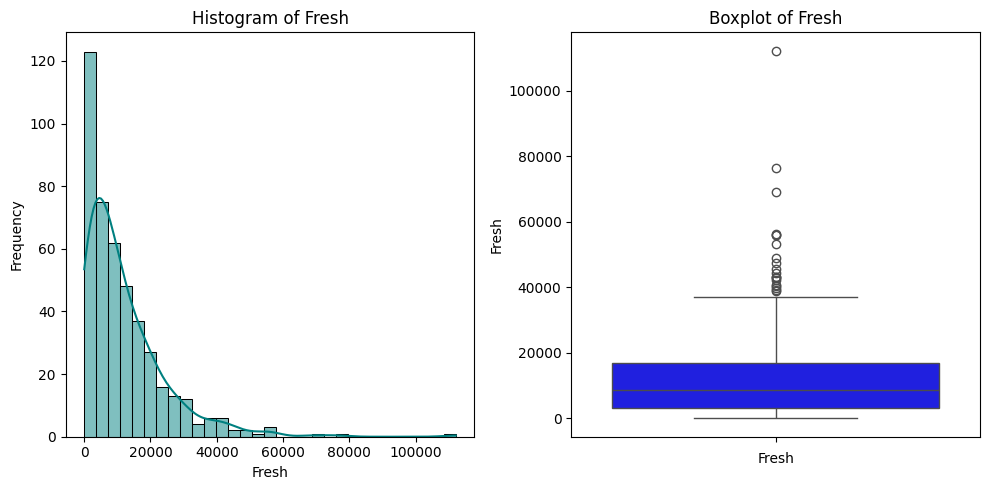

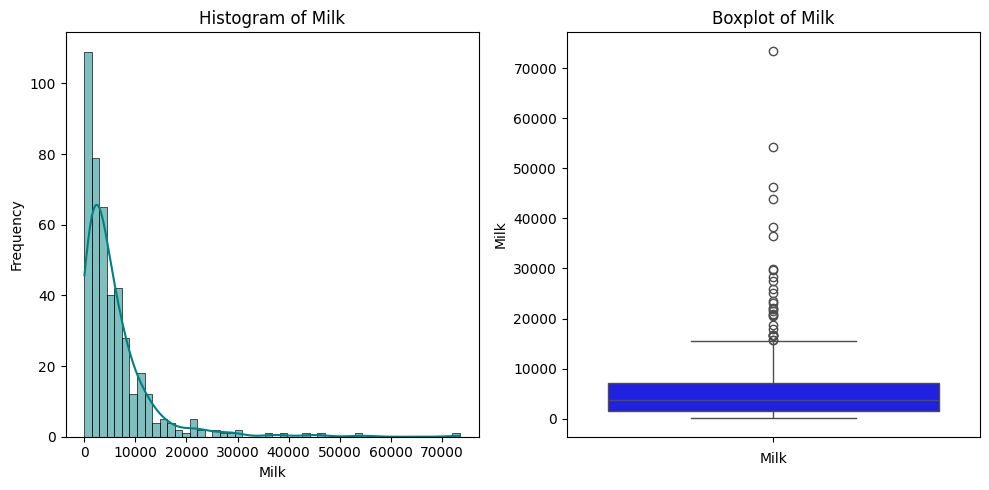

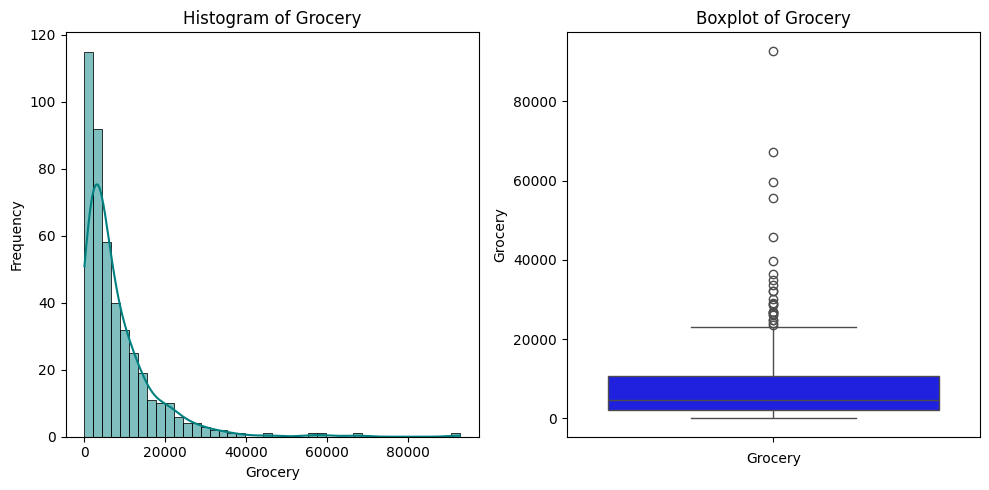

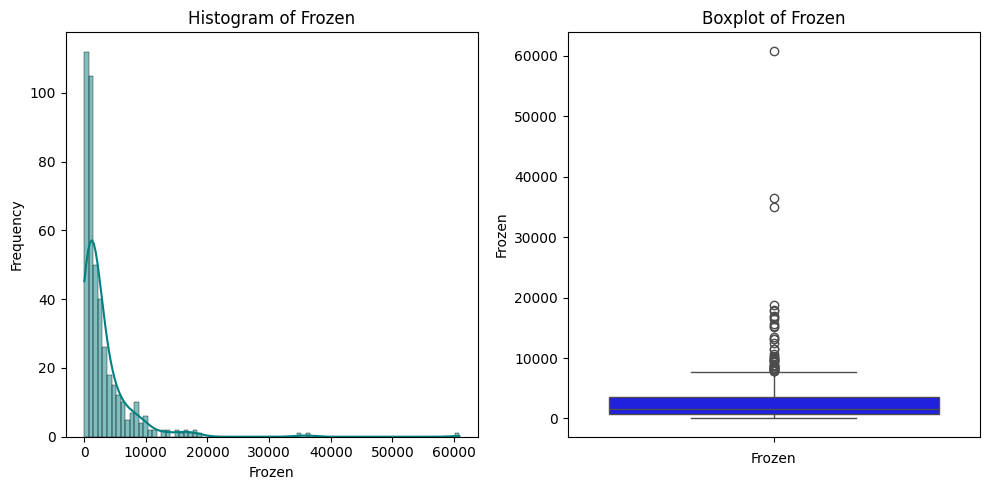

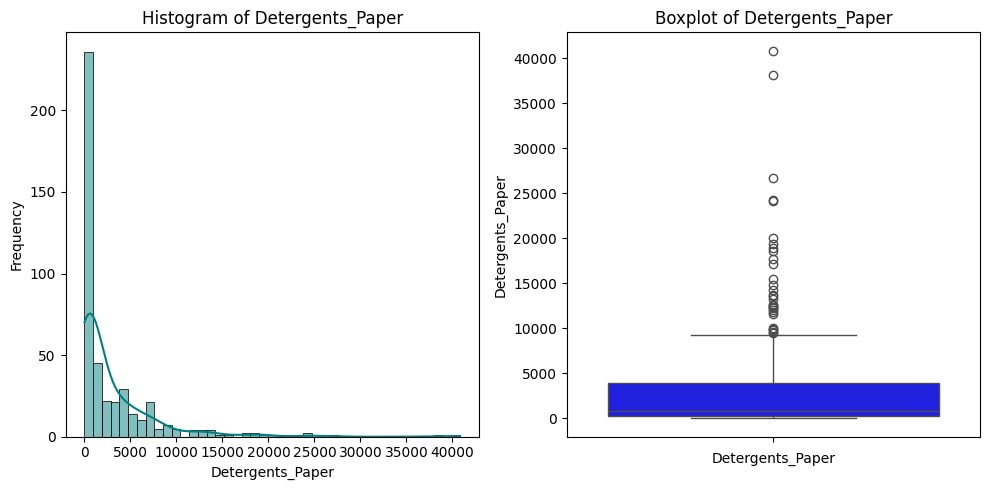

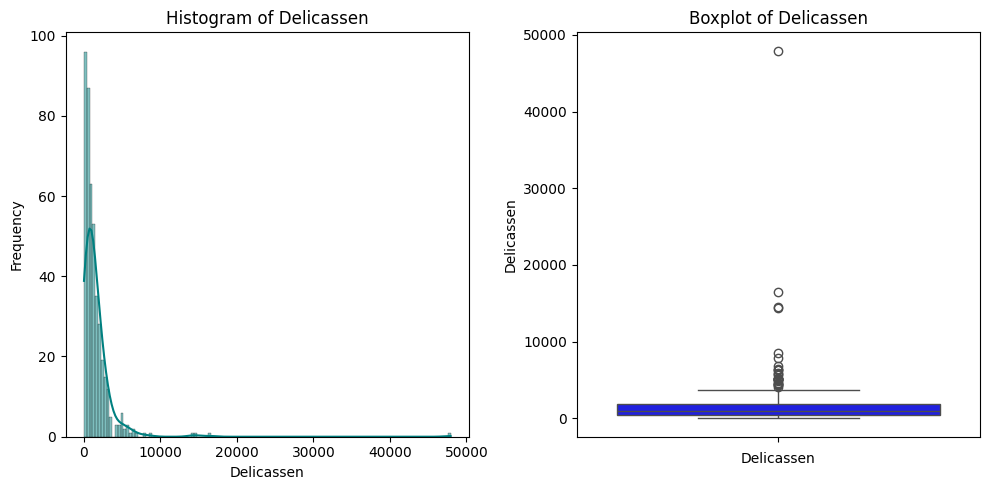

In [ ]:
#visualize each feature in a histogram and a boxplot to see outliers
for col in X.columns[1:]:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X[col], kde=True,color='teal')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X[col],color='b')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


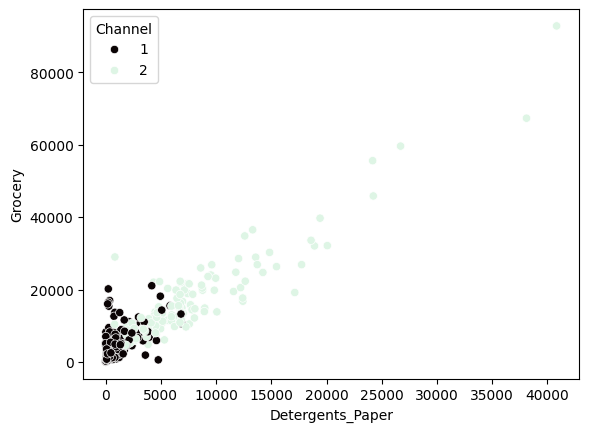

In [ ]:
sns.scatterplot(data=X,x='Detergents_Paper',y='Grocery',hue='Channel',palette='mako')
plt.show()

/tmp/ipython-input-3260312671.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outlier_df.index, y='Outlier Percentage', data=outlier_df, palette="mako")


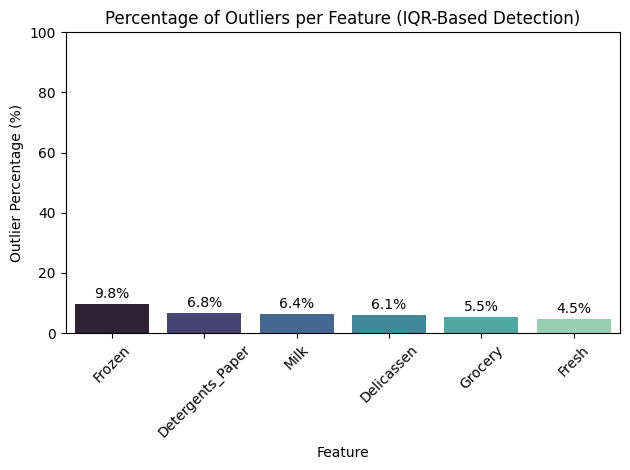

In [ ]:
outlier_percentages = {}

features = X.columns[1:]

for col in features:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outlier_percent = (len(outliers) / len(X)) * 100
    outlier_percentages[col] = outlier_percent

outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])
outlier_df = outlier_df.sort_values('Outlier Percentage', ascending=False)

#plt.figure(figsize=(10, 6))
sns.barplot(x=outlier_df.index, y='Outlier Percentage', data=outlier_df, palette="mako")
plt.title("Percentage of Outliers per Feature (IQR-Based Detection)")
plt.ylabel("Outlier Percentage (%)")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, value in enumerate(outlier_df['Outlier Percentage']):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### Preprocessing

#### Handling Outliers

In [ ]:
def detect_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    outliers=[]
    for value in data[column]:
        if( value> upper_bound) or (value<lower_bound):
            outliers.append(value)
    #print(' column : ', column)
    #print('upper_bound is ',upper_bound,' lower_bound is ',  lower_bound)
    #print('outliers : ',outliers)

In [ ]:
def handle_outliers(data,column):
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-IQR*1.5
    upper_bound=q3+IQR*1.5
    for i in data.index:
        value=data.loc[i,column]
        if(value>upper_bound):
            data.loc[i,column]=upper_bound
        elif(value<lower_bound):
            data.loc[i,column]=lower_bound
    print('Done-->')

In [ ]:
#handle Outliers through data
for col in X.columns[1:]:
    detect_outliers(X,col)
    handle_outliers(X,col)


Done-->
Done-->
Done-->
Done-->
Done-->
Done-->


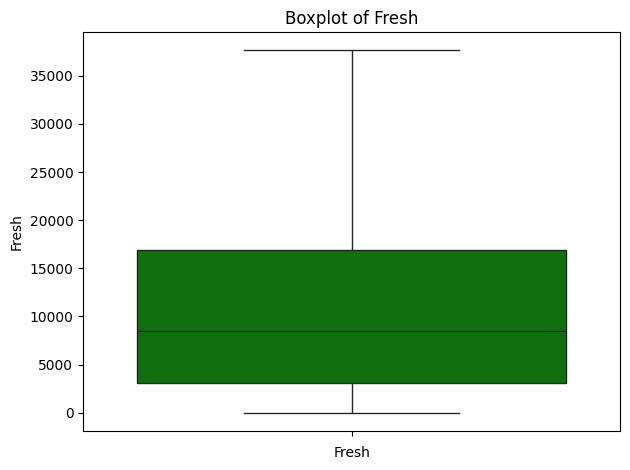

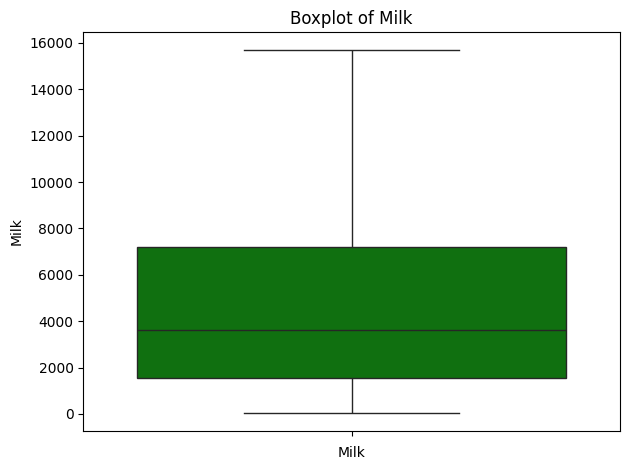

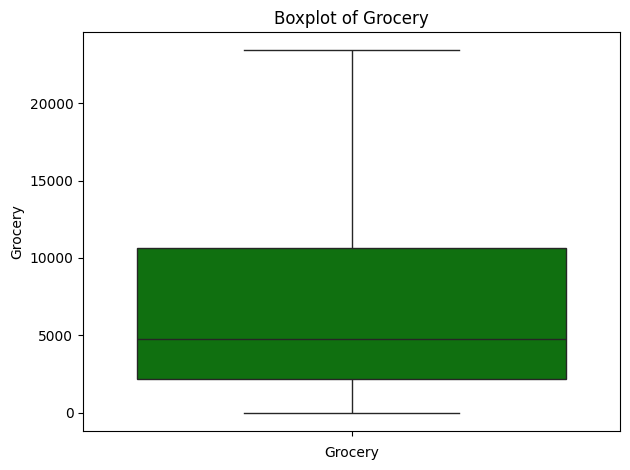

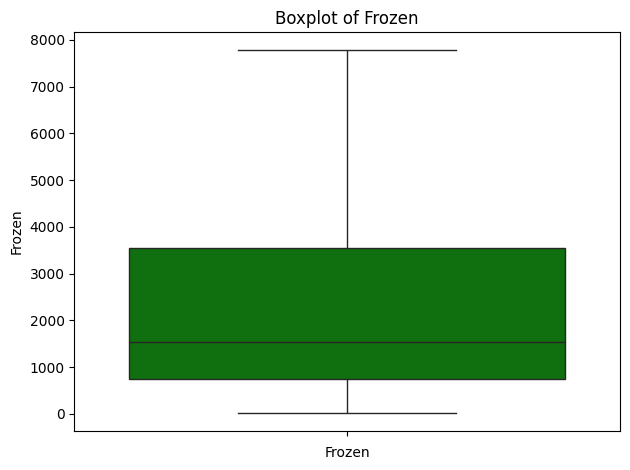

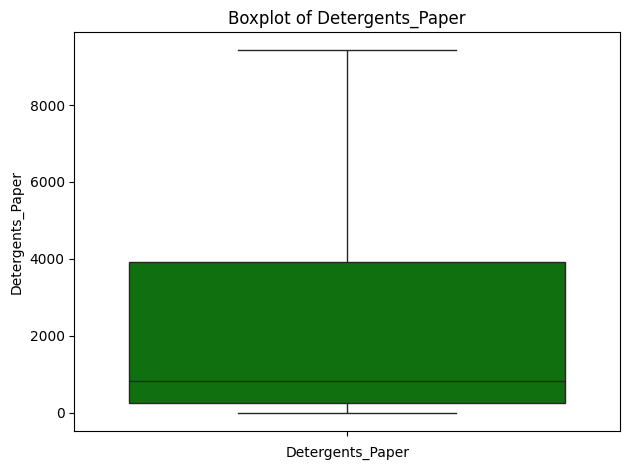

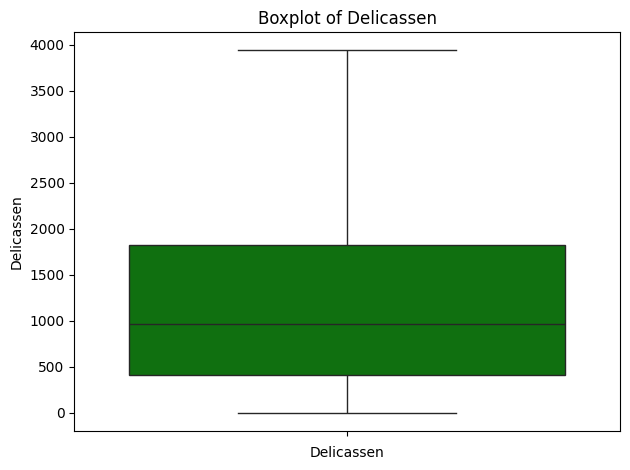

In [ ]:
# Visualize each feature to see outliers in boxplots after handling outliers
for col in X.columns[1:]:
    # Boxplot
    sns.boxplot(y=X[col],color='g')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### Scaling

In [ ]:
# Scaling of features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[1:])

### Clustering Models

#### K-Means


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Elbow method to know the best n_clusters
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

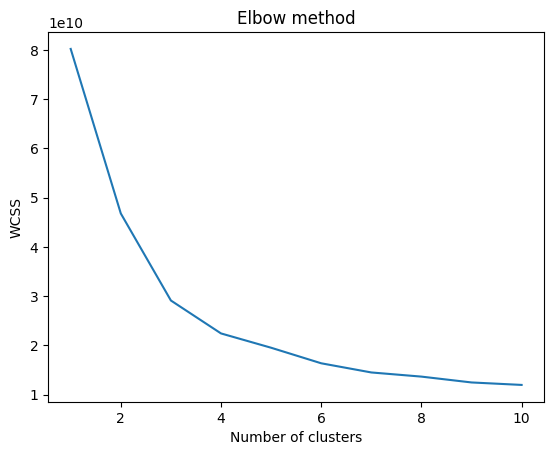

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Kmeans model
kmeans = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)
kmeans_scaled = KMeans(n_clusters = 4, init='k-means++',  random_state = 42)

# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)


# Fit ans predict on the Scaled data
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)


In [ ]:
# See Accuracy of kmeans
silhouette_score(X, y_kmeans)


np.float64(0.3570346842614556)

In [ ]:
silhouette_score(X_scaled, y_kmeans_scaled)

np.float64(0.3190250775617024)